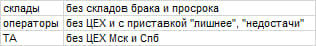

**БП** Оборотно-сальдовая ведомость по счету 41  
Отбор: Номенклатура Не в группе из списка "05. Ингредиенты и расходн...; 07.08 Вторсырье; 07.14 Тестовые образцы дл...; 96. Технические артикулы; 97. Устаревшие артикулы"

In [1]:
import pandas as pd
import numpy as np

In [2]:
va_raw_sklad = pd.read_excel("./data/sklad.xls",skiprows=1, header=0, skipfooter=1)

In [3]:
va_raw_sklad.rename({'Товар':'product', 'Остаток':'quantity3111'}, axis=1, inplace=True)

In [4]:
va_sklad = va_raw_sklad[['product', 'quantity3111']]

In [5]:
va_raw_operator = pd.read_excel("./data/operator.xls",skiprows=1, header=0, skipfooter=1)

In [6]:
va_raw_operator.rename({'Товар':'product', 'Остаток':'quantity3111'}, axis=1, inplace=True)

In [7]:
va_operator = va_raw_operator[['product', 'quantity3111']]

In [8]:
va_raw_ta = pd.read_excel("./data/ta.xls",skiprows=1, header=0, skipfooter=1)

In [9]:
va_raw_ta.rename({'Товар':'product', 'Остаток':'quantity3111'}, axis=1, inplace=True)

In [10]:
va_ta = va_raw_ta[['product', 'quantity3111']]

In [12]:
va = pd.concat([va_sklad, va_operator, va_ta], ignore_index=True)

In [18]:
va = va.groupby(by='product').sum().reset_index()

In [21]:
bp_raw = pd.read_excel("./data/bp.xlsx", skiprows=10, header=None, skipfooter=7)

In [22]:
bp = bp_raw[[0, 1, 2, 3, 9]]

In [23]:
bp = pd.DataFrame({'product':bp[0].iloc[::2].values,
                       'category':bp[1].iloc[::2].values,
                       'srok':bp[2].iloc[::2].values,
                       'sum':bp[9].iloc[::2].values,
                       'quantity3111':bp[9].iloc[1::2].values})

In [24]:
bp.head()

,product,category,srok,sum,quantity3111
0,Dove Антиперспирант карандаш Экстразащита без ...,Хоз. товары,Длительно хранящиеся,774.11,2.0
1,Med Expert Салфетки влажные детские гипоаллерг...,Хоз. товары,Длительно хранящиеся,847.75,10.0
2,Milano энергетический напиток классический ЖБ ...,Напитки,Длительно хранящиеся,787.50,21.0
3,"Milano энергетический напиток манго ЖБ 0,45л",Напитки,Длительно хранящиеся,1725.00,46.0
4,"Old Spice Твердый дезодорант, whitewater 50мл ...",Хоз. товары,Длительно хранящиеся,373.45,1.0


In [25]:
df_merged = pd.merge(bp, va, how='outer', on='product',
                     suffixes=('_bp', '_va'), sort=True, indicator=True)

In [30]:
df_merged.to_excel('3111.xlsx', index=False)

TypeError: category type does not support sum operations